# Global Terrorism Analysis 

This jupyter file consists of TWO parts: 
<li> Part ONE: Data Preparation and Introduction 
<li> Part TWO: Findings and Analysis

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3, venn3_circles
import matplotlib.image as mpimg
%autosave 0

Populating the interactive namespace from numpy and matplotlib


Autosave disabled


#  PART ONE : Data Preparation and Introduction

# Data Preparation

## 1.1  Description Of Raw Dataset

In [252]:
df_raw = pd.read_csv('globalterrorismdb_0617dist.csv')

In [253]:
df_raw.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [254]:
shape(df_raw)

(170350, 135)

In [255]:
print("This Dataset records "+ str(len(df_raw)) +" terrorist attacks"+"\n"+"And"+ " contains "+ str(len(df_raw.columns))+ " variables")

This Dataset records 170350 terrorist attacks
And contains 135 variables


<li>To pick up some meaningful variables in 135 variables, we use both functional method and manual one.  The following count_null function can get the null_value percentage of each varibale. As we can see from the results, there are 64 variables whose null_value percentage higher than 90%.  
<li>Also,we double checked with remained varibales and excluded several invaluable varibales. 

In [256]:
df_raw.columns

Index([u'eventid', u'iyear', u'imonth', u'iday', u'approxdate', u'extended',
       u'resolution', u'country', u'country_txt', u'region',
       ...
       u'addnotes', u'scite1', u'scite2', u'scite3', u'dbsource', u'INT_LOG',
       u'INT_IDEO', u'INT_MISC', u'INT_ANY', u'related'],
      dtype='object', length=135)

In [257]:
def countnull(countdf):
    colname_list=[]
    True_list=[]
    False_list=[]
    for idx,i in zip(countdf.columns, range(0,len(countdf.columns))):
        if countdf.iloc[:,i].isnull().value_counts()[0] != len(countdf):
            colname_list.append(idx)
            True_list.append(countdf.iloc[:,i].isnull().value_counts()[1])
            False_list.append(countdf.iloc[:,i].isnull().value_counts()[0])
    count_null=pd.DataFrame({'colname_list': colname_list,'Null': True_list,'Not_Null': False_list})
    count_null['Null_Percentage']= count_null.Null*1.0/(count_null.Not_Null+count_null.Null)
    Count_table= count_null.sort_values(by='Null_Percentage', ascending=False)
    Count_table=Count_table[Count_table.Null_Percentage>0.9]
    return Count_table

In [258]:
countnull(df_raw).head()

,Not_Null,Null,colname_list,Null_Percentage
41,13,170337,gsubname3,0.999924
70,71,170279,weapsubtype4,0.999583
71,71,170279,weapsubtype4_txt,0.999583
69,74,170276,weaptype4_txt,0.999566
68,74,170276,weaptype4,0.999566


## 1.2 Data Cleaning

#### Notes:
<li>1.  Choose:  the varibales we need to use  and rename those varibales 
<li>2.  Create Total_num:  measures the total number of person got killed and wounded in each terrirsm attack.
<li>3.  Create dummy 'Casualities' :  some one got killed or wounded in a terrism attack, set the value into 1, otherwise 0.
<li>4.  For more data cleaning contents, we put them in seperate finding parts.

In [259]:
df_raw.rename(columns={'iyear':'Year',
                   'imonth':'Month',
                   'iday':'Day',
                   'country_txt':'Country',
                   'region_txt':'Region',
                   'attacktype1_txt':'AttackType',
                   'target1':'Target',
                   'nkill':'Killed',
                   'nwound':'Wounded',
                   'summary':'Summary',
                   'gname':'Group',
                   'targtype1_txt':'Target_type',
                   'targsubtype1_txt':'Sub_Target_type',
                   'weapsubtype1_txt':'Sub_Weapon_type',
                   'weaptype1_txt':'Weapon_type',
                   'suicide':'suicide',
                   'motive':'Motive'},inplace=True)
df=df_raw[['Year','Month','Day','Country','Region','city','latitude','longitude'
       ,'AttackType','Killed','Wounded','Target','Group','Target_type','Sub_Target_type',\
          'success', 'suicide','Weapon_type','Sub_Weapon_type','Motive','Summary','addnotes']]
df['Total_num']=df.Wounded+df.Killed
df.loc[:,'casualities']  = np.where((df.Killed + df.Wounded)>0.0, 1, 0)

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [260]:
df=df[(df.Month!= 0)&(df.Day!= 0)]
df=df.drop(['Target'],axis=1) 

In [261]:
df.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Sub_Target_type,success,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,...,Named Civilian,1,0,Unknown,NaN,NaN,NaN,NaN,1.0,1
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,...,"Police Building (headquarters, station, school)",1,0,Firearms,Unknown Gun Type,To protest the Cairo Illinois Police Deparment,1/1/1970: Unknown African American assailants ...,"The Cairo Chief of Police, William Petersen, r...",0.0,0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,...,Police Security Forces/Officers,0,0,Firearms,Automatic Weapon,NaN,NaN,NaN,0.0,0


In [262]:
shape(df)

(169459, 23)

In [263]:
df.columns.unique()

Index([u'Year', u'Month', u'Day', u'Country', u'Region', u'city', u'latitude',
       u'longitude', u'AttackType', u'Killed', u'Wounded', u'Group',
       u'Target_type', u'Sub_Target_type', u'success', u'suicide',
       u'Weapon_type', u'Sub_Weapon_type', u'Motive', u'Summary', u'addnotes',
       u'Total_num', u'casualities'],
      dtype='object')

## 1.3 Important Columns:

<li><b>Year：</b> This field contains the year in which the incident occurred. 

<li><b>Month：</b>This field contains the number of the month in which the incident occurred.

<li><b>Day：</b>This field contains the numeric day of the month on which the incident occurred.
 

<li><b>Country： </b>This field identifies the country or location where the incident occurred.Separatist regions, such as Kashmir, Chechnya, South Ossetia, Transnistria, or Republic of Cabinda, are coded as part of the “home” country. In the case where the country in which an incident occurred cannot be identified, it is coded as “Unknown.”

<li><b>Region：</b>This field identifies the region in which the incident occurred. The regions are divided into 12 categories.

<li><b>City： </b>This field contains the name of the city, village, or town in which the incident occurred. If the city, village, or town for an incident is unknown, then this field contains the smallest administrative area below provstate which can be found for the incident (e.g., district).

<li><b>Latitude: </b>This field records the latitude (based on WGS1984 standards) of the city in which the event occurred.

<li><b>Longitude: </b>This field records the longitude (based on WGS1984 standards) of the city in which the event occurred.

<li><b>Attack Type: </b>This field captures the general method of attack and often reflects the broad class of tactics used. It consists of nine categories：Assassination, Hijacking, Kidnapping, Barricade Incident, Bombing/Explosion, Armed Assault, Unarmed Assault, Facility/Infrastructure Attack, Unknown

<li><b>Killed： </b>This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident. 

<li><b>Wounded： </b>This field records the number of confirmed non-fatal injuries to both perpetrators and victims. It follows the conventions of the “Total Number of Fatalities” field described above.

<li><b>Group: </b> This field contains the name of the group that carried out the attack. In order to ensure consistency in the usage of group names for the database, the GTD database uses a standardized list of group names that have been established by project staff to serve as a reference for all subsequent entries.

<li><b>Target_type: </b> The target/victim type field captures the general type of target/victim. When a victim is attacked specifically because of his or her relationship to a particular person, such as a prominent figure, the target type reflects that motive. This variable consists of the 22 categories.

<li><b>Sub_Target: </b>The target subtype variable captures the more specific target category and provides the next level of designation for each target type. If a target subtype is not applicable this variable is left blank. 

<li><b>Weapon_type: </b>This field records the general type of weapon used in the incident. 

<li><b>Sub_Weapon_type: </b>This field records a more specific value for most of the Weapon Types identified immediately above. 

<li><b>Motive:</b> When reports explicitly mention a specific motive for the attack, this motive is recorded in the “Motive” field. This field may also include general information about the political, social, or economic climate at the time of the attack if considered relevant to the motivation underlying the incident.

<li><b>Summary: </b>A brief narrative summary of the incident, noting the “when, where, who, what, how,and why".

<li><b>addnotes:</b>This field is used to capture additional relevant details about the attack.

<li><b>Success：</b>Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators. 1 = "Yes" The incident was successful. 0 = "No" The incident was not successful

<li><b>Suicide Attack： </b>This variable is coded “Yes” in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive.

<li><b>Total_num：</b> This field measures the total number of person got killed and wounded in each terrirsm attack.

<li><b>Casualities:</b> some one got killed or wounded in a terrism attack, set the value into 1, otherwise 0.

# Introduction

Research Question: 
How have economic conditions improved, but exposures instead increased globally ?

## 1.1  Terrorism By Year On Different Regions 

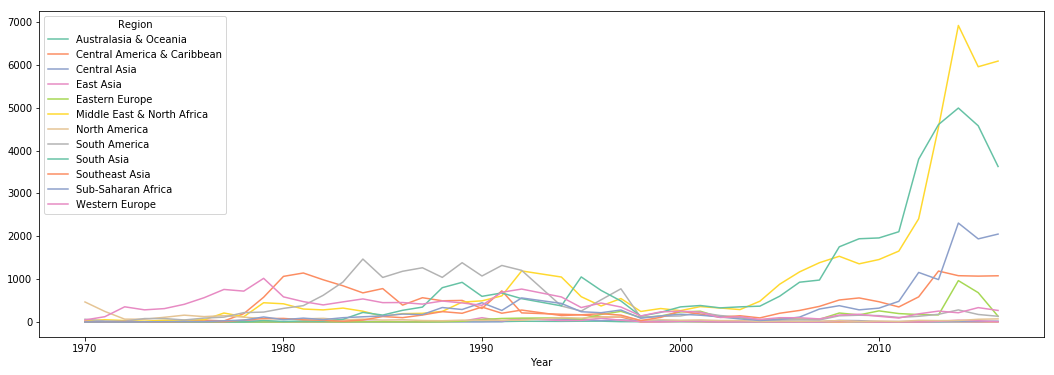

In [264]:
df_region=pd.crosstab(df.Year,df.Region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## 1.2 Terrorism By Motives

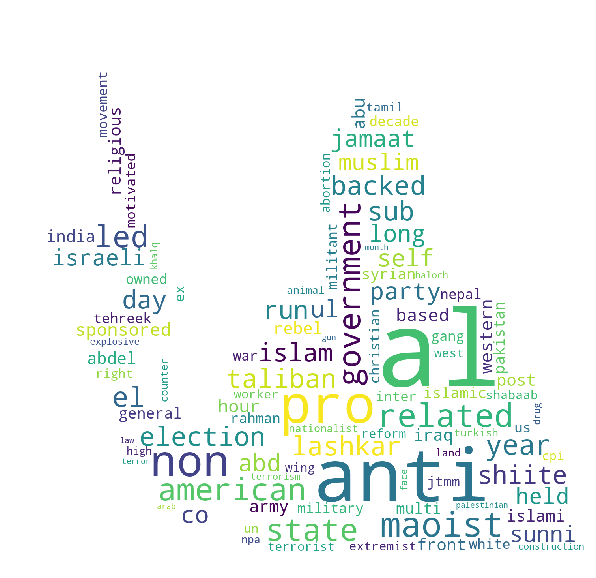

In [265]:
back_pic = mpimg.imread('movtive_mask.png') 
back_pic.shape
plt.imshow(back_pic) 
plt.axis('off') 
fig=plt.gcf()
fig.set_size_inches(18,10) 
plt.show()

# PART TWO : Findings and Analysis

From the dataset, we found the following three findings:
    1. Deadliest And Most Active Terrorist Groups You Didn’t Know ! 
    2. Why Terrorism in Western Europe Brought Low Causualties?
    3. Are Oil or Gas Primary Targets for Terrorists? NO!

# Finding 1:  Deadliest And Most Active Terrorist Groups You Didn’t Know ! 

Regarding all groups. How deadliest they are?  How active they are? Any similarities? Any differences?  

# 1.1  Assumption

<li> Deadliest group and Active groups must share a lot of difference in weapons and attack types so that different terrisim attack led to two different results: (attack most)  or  (causalities most)

## 1.1.1 Terrorist Groups By Attack Times & Num_Casualties: 
The dataset records the terrorist incidents by more than 3000 terrism groups.

In [266]:
len(df.Group.unique())

3434

The code below shows if we groupby group, and get aggregate number of each groups' total attack times and casued casaulities.

In [267]:
df_terro_group=df.groupby('Group').agg({'Group':'count', 'Total_num':'sum'}).\
rename(columns={'Group':"Times"})
df_terro_group=df_terro_group.reset_index()  

We take all terrorism groups into account and get the total number of terrorist attack together with total casualities caused of each group.  These two values noted as 'Times' and 'Total_num'. 

In [268]:
df_terro_group.head(10)

,Group,Times,Total_num
0,1 May,10,2.0
1,14 K Triad,4,0.0
2,14 March Coalition,1,85.0
3,14th of December Command,3,0.0
4,15th of September Liberation Legion,1,1.0
5,16 January Organization for the Liberation of ...,24,33.0
6,1920 Revolution Brigades,2,34.0
7,19th of July Christian Resistance Brigade,1,1.0
8,1st of May Group,3,0.0
9,2 April Group,6,1.0


We noticed that some of groups with less attack times really caused huge number of casaulities, whereas some of the other 
groups were quite active (attacked a lot) but with quite small number of wounds and fatalities. 

Referring to this fact, we started to analize finding 1. 

# 1.2 Analysis

## 1.2.1 Data Preperation


### Firstly, plot on the Terrorism Group with number of attack times and total wounds and fatalities

Ranked the terrorist groups by number of wounds and fatalities. 
Found the group with most value is Unkown,which means the dataset did not record the group information of those terrorist attacks 

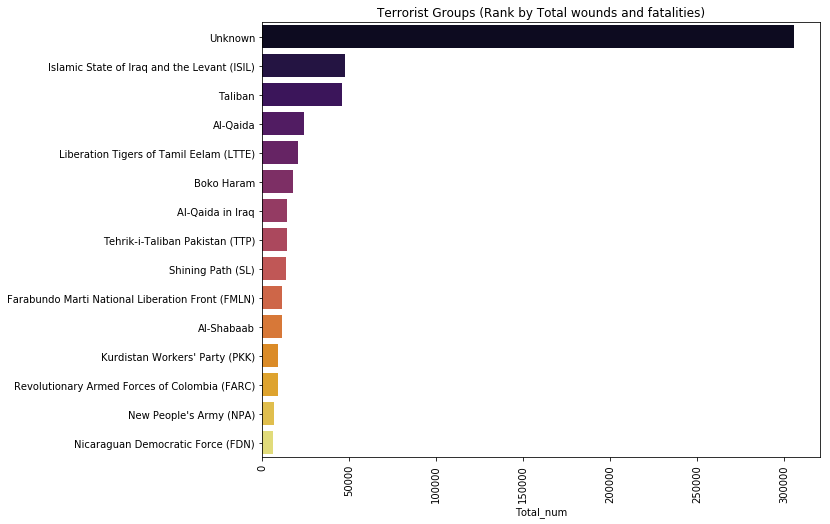

In [269]:
sns.barplot(x=df_terro_group.Total_num.nlargest(15)[0:15], y=df_terro_group.iloc[df_terro_group.Total_num.nlargest(15)[0:15].index].Group.values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups (Rank by Total wounds and fatalities)')
plt.show()


After removing the unknown group

Text(0.5,1,u'Terrorist Groups (Rank by attack times)')

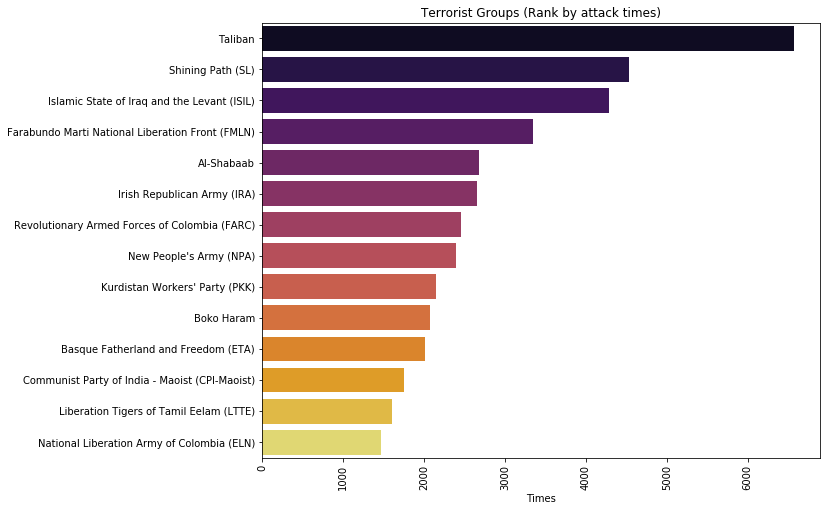

In [270]:
sns.barplot(x=df_terro_group.Times.nlargest(15)[1:15], y=df_terro_group.iloc[df_terro_group.Times.nlargest(15)[1:15].index].Group.values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups (Rank by attack times)')

The following plot is the groups ranked by number of casualties also excluding the unkown group.
Comparing the groups in these two ranks we noticed that there have some overlaps,they are quite different.(Al qaida which responsible for 911 attack in 2012 US) 
o named these groups 'active' and 'deadliest'

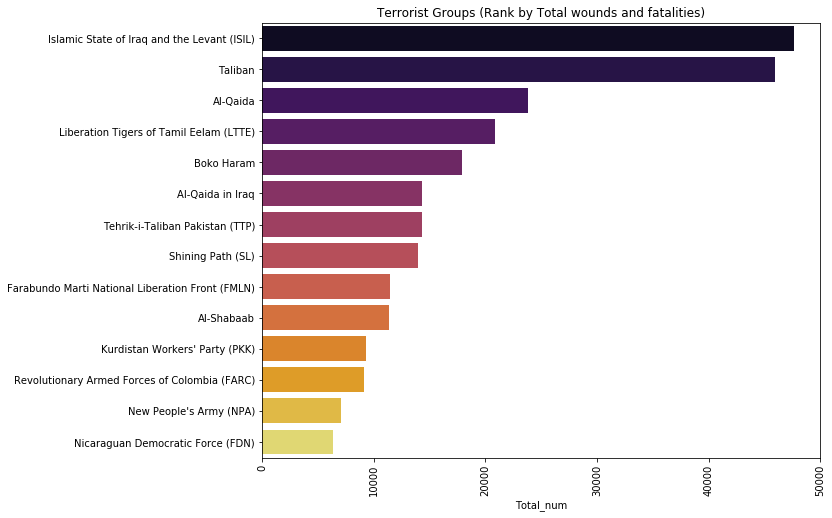

In [271]:
sns.barplot(x=df_terro_group.Total_num.nlargest(15)[1:15], y=df_terro_group.iloc[df_terro_group.Total_num.nlargest(15)[1:15].index].Group.values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups (Rank by Total wounds and fatalities)')
plt.show()


### Secondly,  Subset Terrorist Groups Based On Two Standards.

Subset one group by attack times, choose top 100. 

In [272]:
##Time Max
index_times_100=df.groupby('Group').size()[df.groupby('Group').size().values!=1].nlargest(100).index
value_times_100=df.groupby('Group').size()[df.groupby('Group').size().values!=1].nlargest(100).values
df_times_100=df[df['Group'].isin(index_times_100)]

Subset another group by casulities numbers, choose top 100. 

In [273]:
##Dead Max
index_dead_100=df.groupby('Group').agg({'Total_num':'sum'}).Total_num.nlargest(100).index
values_dead_100=df.groupby('Group').agg({'Total_num':'sum'}).Total_num.nlargest(100).values
df_dead_100=df[df['Group'].isin(index_dead_100)]

In [274]:
#df_merge=df0.merge(group_table, how='left')
#df=df_merge[df_merge['Times'].isnull()==False]
#df_final.to_csv('Final_Python1.csv', index=False)

In [275]:
group_times_100=pd.DataFrame({'Group_Name':index_times_100, 'Value_Times':value_times_100})
group_dead_100=pd.DataFrame({'Group_Name':index_dead_100, 'values_dead':values_dead_100})

In [276]:
group_inner=group_times_100.merge(group_dead_100,how='inner')
group_outer_130=group_times_100.merge(group_dead_100,how='outer')
inner_list=group_inner.Group_Name.values
group_outer_130_list=group_outer_130.Group_Name
group_times_100=group_times_100.set_index(['Group_Name'])
group_dead_100=group_dead_100.set_index(['Group_Name'])

In [277]:
df_times_100=df[df['Group'].isin(group_times_100.index)]
df_dead_100=df[df['Group'].isin(group_dead_100.index)]
#df_dead_30.to_csv('dead_30.csv', index=False)
#df_times_30.to_csv('Times_30.csv', index=False)
#df_times_100.to_csv('Times_100.csv', index=False)
#df_dead_100.to_csv('Dead_100.csv', index=False)
#df_group_130=df[df['Group'].isin(group_outer_130_list.index)]group_outer_130_list
#df_group_130.to_csv('group_130.csv', index=False)

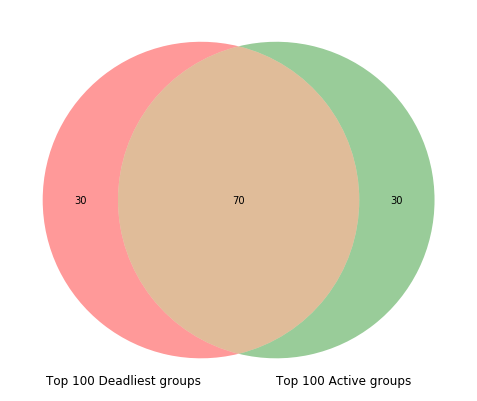

In [278]:
set1 = set(group_dead_100.index)
set2 = set(group_times_100.index)
venn2([set1, set2], ('Top 100 Deadliest groups', 'Top 100 Active groups'))
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.show()

We drew the venn graph of 100 groups from 'active' and 'deadliest' and found that
there are 70 groups overlapping.
So we started with those 30 groups that do not overlap and try to find some interesting findings there.

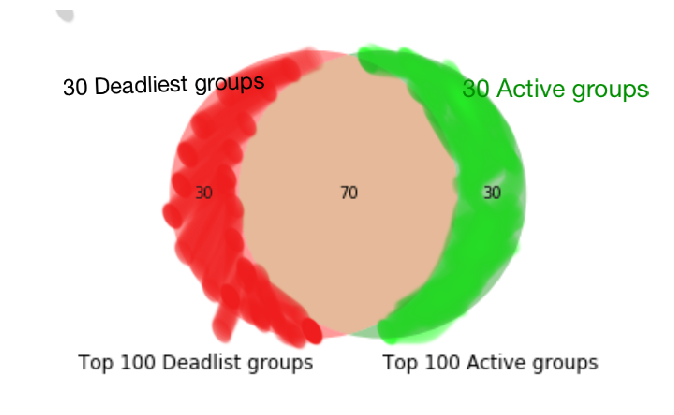

In [279]:
venn_pic = mpimg.imread('Image003.tif') 
venn_pic.shape
plt.imshow(venn_pic) 
plt.axis('off') 
fig=plt.gcf()
fig.set_size_inches(18,7) 
plt.show()

### Thirdly, Found Unexpected 30 Deadliest And Most Active Terrorist Groups

The following code aims to create 3 new dataset which is the 30 Deadliest group, 30 active group and 70 inner group respectively.

In [280]:
#in the Middle 70 groups 
df_groups_70=df[df['Group'].isin(inner_list)]

In [281]:
times_max_30=[]
for i in group_times_100.index:
    if i not in inner_list:
        times_max_30.append(i)

In [282]:
dead_max_30=[]
for j in group_dead_100.index:
    if j not in inner_list:
        dead_max_30.append(j)

In [283]:
times_max=group_times_100.loc[times_max_30]
dead_max=group_dead_100.loc[dead_max_30]
df_times_30=df[df['Group'].isin(times_max.index)]
df_dead_30=df[df['Group'].isin(dead_max.index)]

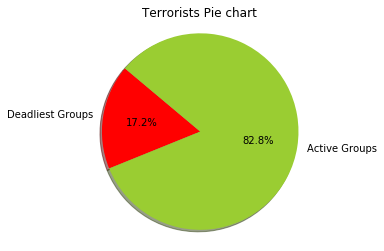

In [284]:
import matplotlib.pyplot as plt
labels=['Deadliest Groups', 'Active Groups']
X=[len(df_dead_30),len(df_times_30)]
colors = ['red', 'yellowgreen']
explode = (0, 0 )
fig = plt.figure() 
plt.pie(X, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, colors=colors,startangle=140)
plt.axis('equal')
plt.title("Terrorists Pie chart") 
plt.show()

We show the percentage of number of terriorist attack of theses 60 groups.
As we can see, the active groups occupy 82.8% of number of attacks

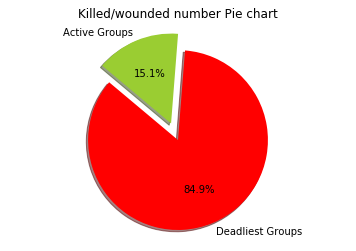

In [285]:
labels=['Deadliest Groups', 'Active Groups']
X=[df_dead_30.Total_num.sum(),df_times_30.Total_num.sum()]
fig = plt.figure()  
colors = ['red', 'yellowgreen']
explode = (0.2, 0 )
fig = plt.figure() 
plt.pie(X, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, colors=colors,startangle=140)
plt.axis('equal')
plt.title("Killed/wounded number Pie chart") 
plt.show()
# As we can see, the deadliest groups occupy 84.9% of number of death and wound

As we can see, the deadliest groups occupy 84.9% of number of death and wound

## 1.2.2 Why They Are So Different? 

### A. Regional Difference

We want to figure out the geographic distributions of these three groups.

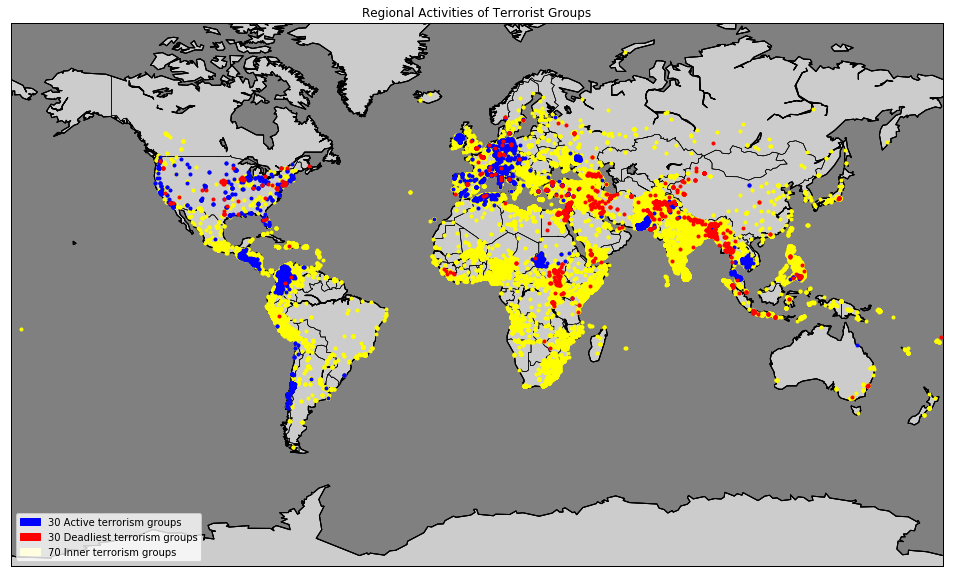

In [286]:
import matplotlib.patches as mpatches
def draw_group(top_groups,color='r',m4=None):
    if not m4:
        m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
        m4.drawcoastlines()
        m4.drawcountries()
        m4.fillcontinents(lake_color='grey')
        m4.drawmapboundary(fill_color='grey')
        fig=plt.gcf()
        fig.set_size_inches(22,10)
    group=list(top_groups['Group'].unique())
    for g in group:
        lat_group=list(top_groups[top_groups['Group']==g].latitude)
        long_group=list(top_groups[top_groups['Group']==g].longitude)
        x_group,y_group=m4(long_group,lat_group)
        m4.plot(x_group,y_group,'go',markersize=3,color=color,label=g)
#     legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
#     frame=legend.get_frame()
#     frame.set_facecolor('white')
#     plt.show()
    return m4

m4=draw_group(df_groups_70,'yellow')
m4=draw_group(df_times_30,'b')
m4=draw_group(df_dead_30,'r')
patch1 = mpatches.Patch(color='b', label='30 Active terrorism groups')
patch2 = mpatches.Patch(color='r', label='30 Deadliest terrorism groups')
patch3 = mpatches.Patch(color='lightyellow', label='70 Inner terrorism groups')
plt.legend(handles=[patch1,patch2,patch3],loc=3)
plt.title('Regional Activities of Terrorist Groups')
plt.show()

In [287]:
##Merge into plot
labels=df_dead_30.groupby('Region').size().sort_values(ascending=False).index
X=df_dead_30.groupby('Region').size().sort_values(ascending=False).values
df_labels=pd.DataFrame({'Region':labels, 'Times':X})
df_labels['Ratio']=df_labels.Times*1.0/(df_labels.Times.sum())
labels_2=df_times_30.groupby('Region').size().sort_values(ascending=False).index
X_2=df_times_30.groupby('Region').size().sort_values(ascending=False).values
df_labels_2=pd.DataFrame({'Region':labels_2, 'Times2':X_2})
df_labels_2['Ratio2']=df_labels_2.Times2*1.0/(df_labels_2.Times2.sum())

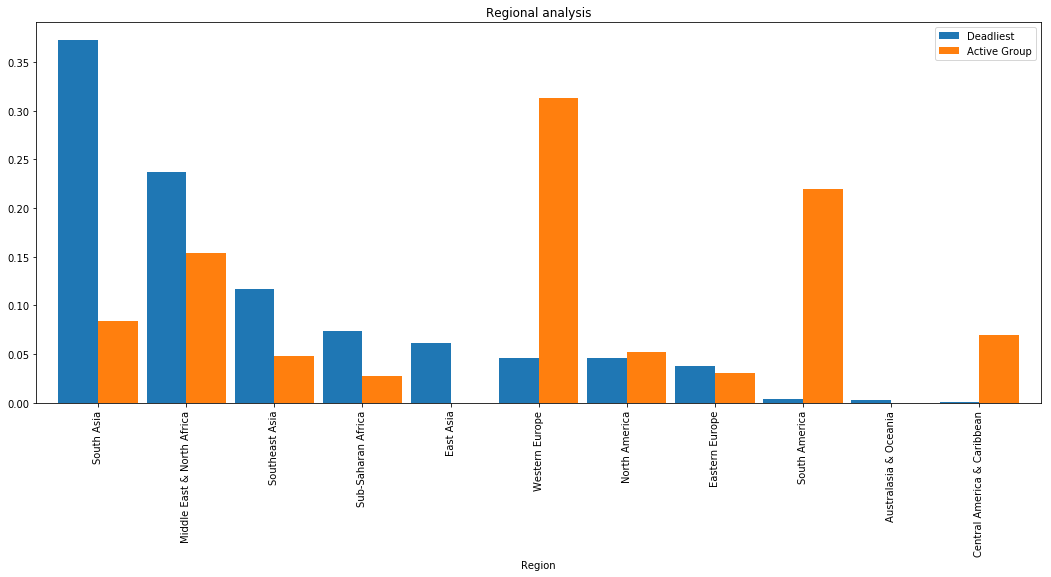

In [288]:
df_labels.merge(df_labels_2,how='inner').drop(columns=['Times','Times2']).\
rename(columns={'Ratio':'Deadliest','Ratio2':'Active Group'}).set_index(keys='Region').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.title('Regional analysis')
plt.show() 

Looking at the map and barplot above, we have the following key findings
1. The 'active' groups are most active in Europe
2. The 'active' groups are more wide spread comparing to the 'deadliest' group
3. The inner groups are more worldwide and distributed on most of the populated regions which is also as expected.

#### Next we will be more focused on the difference between the active and deadliest group.

### B. Motive Perspective

Use the nltk package and wordcloud package to get the keyword of motive

In [289]:
import nltk
from wordcloud import WordCloud
nltk.download('popular')
def gen_word_cloud(series,use_mask=False,save_file_name=None):
    text=series.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
    text=text.decode('unicode_escape').encode('ascii','ignore')
    words=nltk.tokenize.word_tokenize(text)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    if use_mask:
        mask = np.array(Image.open("kaggle.png"))
        width=mask.shape[1]
        height=mask.shape[0]
    else:
        mask=None
        width=1000
        height=1000
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=stopwords,max_words=100, background_color='white',mask=mask,
                         width=width, height=height).\
        generate(" ".join(words_except_stop_dist))
    plt.imshow(wordcloud)
    plt.axis("off")
    if save_file_name:
        wordcloud.to_file(save_file_name)

[nltk_data] Downloading collection u'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/liyuexi/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/liyuexi/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/liyuexi/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/liyuexi/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/liyuexi/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/liyuexi/nltk_data...
[nltk_data]    |   Package movie_reviews is 

Word cloud picture shows the keyword of 30 Deadliest group

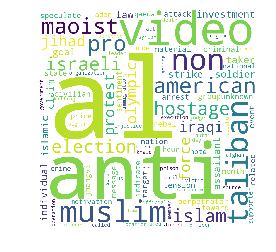

In [290]:
gen_word_cloud(df_dead_30.Motive)

Word cloud picture shows the keyword of 30 Active group 

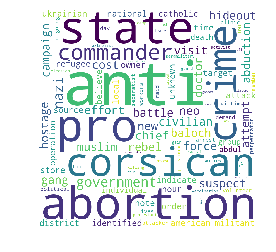

In [291]:
gen_word_cloud(df_times_30.Motive)

Comparing to the active group, the motive of the deadliest groups are more about religion and politics

###  C. Weapon Type

This plot shows each weapon type and its corresponding Ratio of using in terrorist attack.

In [292]:
##Merge into plot
labels_w=df_dead_30.groupby('Weapon_type').size().sort_values(ascending=False).index
X_w=df_dead_30.groupby('Weapon_type').size().sort_values(ascending=False).values
df_labels_w=pd.DataFrame({'Weapon_type':labels_w, 'Times':X_w})
df_labels_w['Ratio']=df_labels_w.Times*1.0/(df_labels_w.Times.sum())
labels_2_w=df_times_30.groupby('Weapon_type').size().sort_values(ascending=False).index
X_2_w=df_times_30.groupby('Weapon_type').size().sort_values(ascending=False).values
df_labels_2_w=pd.DataFrame({'Weapon_type':labels_2_w, 'Times2':X_2_w})
df_labels_2_w['Ratio2']=df_labels_2_w.Times2*1.0/(df_labels_2_w.Times2.sum())

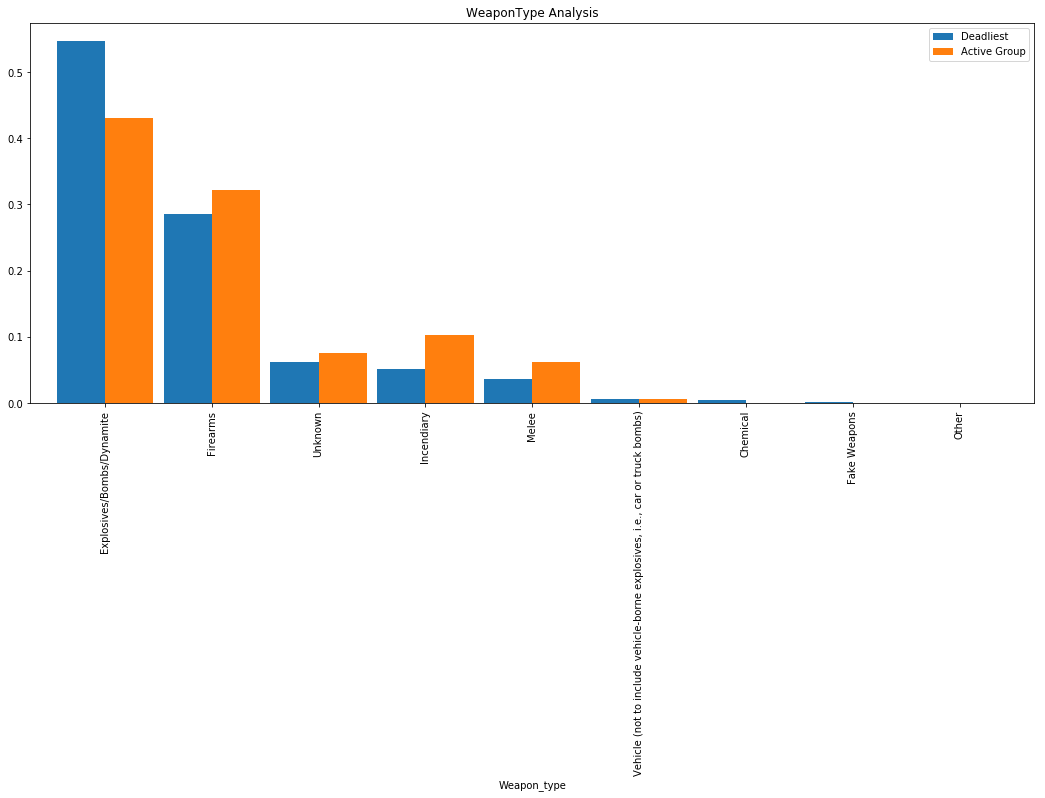

In [293]:
df_labels_w.merge(df_labels_2_w,how='inner').drop(columns=['Times','Times2']).\
rename(columns={'Ratio':'Deadliest','Ratio2':'Active Group'}).set_index(keys='Weapon_type').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,7) 
plt.title('WeaponType Analysis')
plt.show() 

### D. Attack Type

In [294]:
##Mergeainto plot
labels_a=df_dead_30.groupby('AttackType').size().sort_values(ascending=False).index
X_a=df_dead_30.groupby('AttackType').size().sort_values(ascending=False).values
df_labels_a=pd.DataFrame({'AttackType':labels_a, 'Times':X_a})
df_labels_a['Ratio']=df_labels_a.Times*1.0/(df_labels_a.Times.sum())
labels_2_a=df_times_30.groupby('AttackType').size().sort_values(ascending=False).index
X_2_a=df_times_30.groupby('AttackType').size().sort_values(ascending=False).values
df_labels_2_a=pd.DataFrame({'AttackType':labels_2_a, 'Times2':X_2_a})
df_labels_2_a['Ratio2']=df_labels_2_a.Times2*1.0/(df_labels_2_a.Times2.sum())

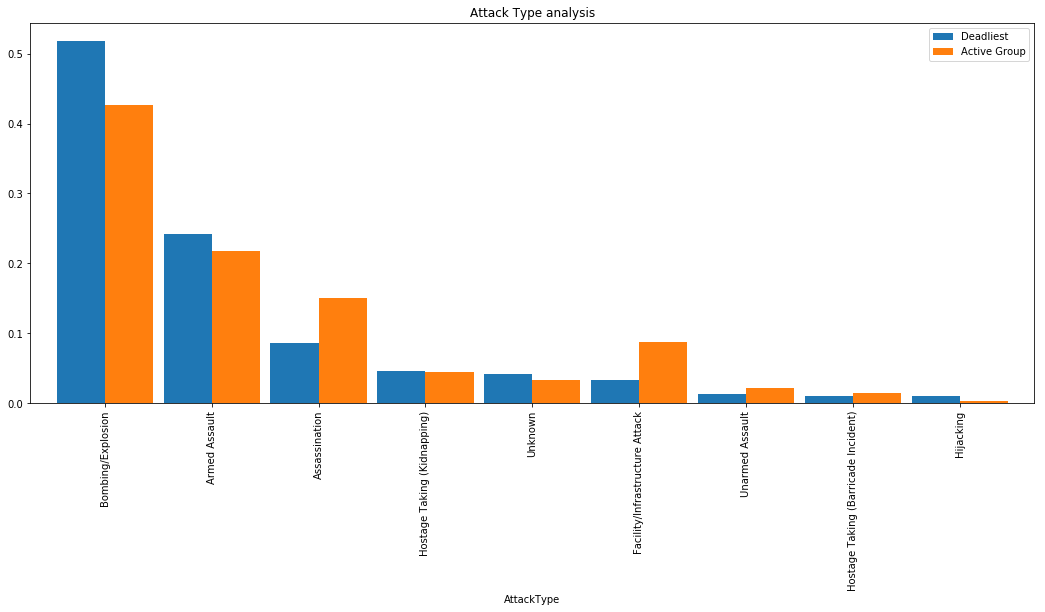

In [295]:
df_labels_a.merge(df_labels_2_a,how='inner').drop(columns=['Times','Times2']).\
rename(columns={'Ratio':'Deadliest','Ratio2':'Active Group'}).set_index(keys='AttackType').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,7) 
plt.title('Attack Type analysis')
plt.show() 

We can see from the attack type plot and weapon type plot, those two groups did not share much difference, meaning that their ways of conducting terrorist are pretty much the same expect the regional issues and motives.

What else could be the reason behind the scene?

## 1.2.3 Significant Reason: Suicide attack !!!

In [296]:
list_suici_times=[len(df_times_30[df_times_30.suicide==1]),len(df_times_30)]
list_suici_dead=[len(df_dead_30[df_dead_30.suicide==1]),len(df_dead_30)]

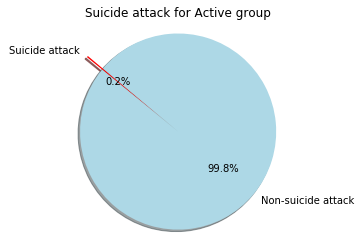

In [297]:
labels=['Suicide attack', 'Non-suicide attack']
X=list_suici_times
colors = ['red', 'lightblue']
explode = (0.2, 0 )
plt.pie(X, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, colors=colors,startangle=140)
plt.axis('equal')
plt.title("Suicide attack for Active group")
plt.show()

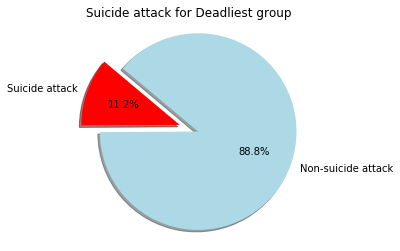

In [298]:
labels=['Suicide attack', 'Non-suicide attack']
X=list_suici_dead
colors = ['red', 'lightblue']
explode = (0.2, 0 )
plt.pie(X, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, colors=colors,startangle=140)
plt.axis('equal')
plt.title("Suicide attack for Deadliest group") 
plt.show()

<li>The interesting difference is that active group rarely conduct suicide attack(0.2%),but deadliest groups conduct rougly 11% of suicide attacks.
<li> How horrible if a terrorist attack is a suicide attack?

In [299]:
all_suici=[df[df.suicide==1].Total_num.sum(),df[df.suicide==0].Total_num.sum()]
part_suici=[df_dead_30[df_dead_30.suicide==1].Total_num.sum(),\
            df_dead_30[df_dead_30.suicide==0].Total_num.sum()]

Text(0.5,1,u'Suicide attack for Deadlist group')

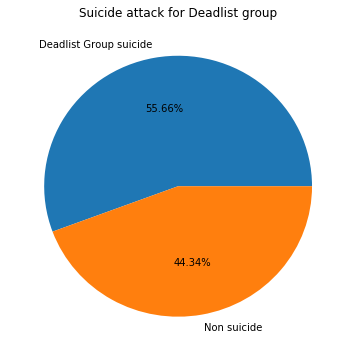

In [300]:
labels=['Deadlist Group suicide', 'Non suicide']
X=part_suici
fig = plt.figure().set_size_inches(6,6) 
plt.pie(X,labels=labels,autopct='%1.2f%%')
plt.title("Suicide attack for Deadlist group") 

Although suicide attack only accounts for nearly 10% from those deadliest groups, it caused 55.66% of deadth and wounds. 

# 1.3 Conclusion:

<li> Although at frist we hope to find something different in regards to the weapon type and attack type of these two kind of groups, 
unexpectly the results show their way of attack and attack weapon are quite similar. 
<li> When we looked into the dataset and digged from the information recorded of the terrorism attacks,we found the most horrible,bloody and extreme attack is depends on the attack-motive---an attack is whether conducted in a suicide way. 

##  ------------------------------------------------Finding 2-------------------------------------------------

# Finding 2 : Why Terrorism in Western Europe Brought Low Causualties?

# 2.1 Assumption

Is casualties in each time attack balanced in world wide? We assume developed countries may have low time and casuality ration. So first we did a small calculation to test the assumption.

In [301]:
df_raw = pd.read_csv('group_130.csv')

In [302]:
df_raw.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Sub_Target,success,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities
0,1970,1,2,United States,North America,Oakland,37.805065,-122.273024,Bombing/Explosion,0.0,...,Electricity,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,1/2/1970: Unknown perpetrators detonated explo...,"Damages were estimated to be between $20,000-$...",0.0,0
1,1970,1,6,United States,North America,Denver,39.740010,-104.992259,Facility/Infrastructure Attack,0.0,...,Military Recruiting Station/Academy,1,0,Incendiary,Molotov Cocktail/Petrol Bomb,Protest the draft and Vietnam War,1/6/1970: Unknown perpetrators threw a Molotov...,NaN,0.0,0
2,1970,1,8,Italy,Western Europe,Rome,41.890520,12.494249,Hijacking,0.0,...,Aircraft (not at an airport),1,0,Firearms,Rifle/Shotgun (non-automatic),NaN,NaN,NaN,0.0,0
3,1970,1,9,United States,North America,Detroit,42.331685,-83.047924,Facility/Infrastructure Attack,0.0,...,Government Building/Facility/Office,1,0,Incendiary,Molotov Cocktail/Petrol Bomb,NaN,1/9/1970: Unknown perpetrators set off a fireb...,NaN,0.0,0
4,1970,1,20,Guatemala,Central America & Caribbean,Guatemala City,14.624422,-90.532880,Assassination,1.0,...,Embassy/Consulate,1,0,Unknown,NaN,NaN,NaN,NaN,1.0,1


In [303]:
df_2=df_raw.groupby('Region').agg({'Region':'count', 'Total_num':'sum'}).rename(columns={'Region':'Times'})

In [304]:
df_2['Time_Casuality_ratio'] = df_2['Total_num']/df_2['Times']

In [305]:
df_2

,Times,Total_num,Time_Casuality_ratio
Region,,,
Australasia & Oceania,174,193.0,1.109195
Central America & Caribbean,8911,31141.0,3.494670
Central Asia,461,2466.0,5.349241
East Asia,555,9378.0,16.897297
Eastern Europe,4602,16112.0,3.501086
Middle East & North Africa,43127,289184.0,6.705405
North America,1353,21545.0,15.923873
South America,16919,39330.0,2.324605
South Asia,37415,193930.0,5.183215


In [306]:
df_bar=pd.DataFrame({'bar': df_2.index, 'bar_val':df_2['Time_Casuality_ratio']}).sort_values(by = ['bar_val'])

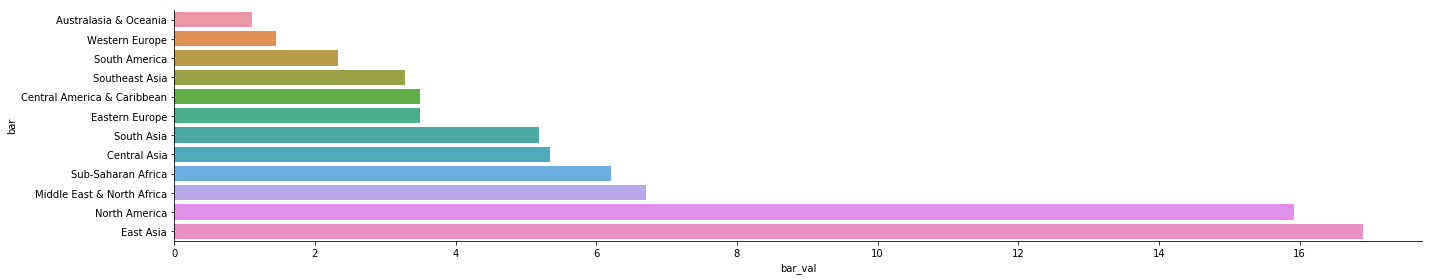

In [307]:
sns.factorplot(y='bar',x='bar_val',data=df_bar,kind='bar',aspect=5)

Through the histogram above, we found quite suprised result. Not all developed countries have low ration. The first one is Australasia and oceania area, while considering its low attack time happened in last 50 years, we didn't keep study on it. We then found the second one is Western Europe, which owns 1.4 ration and had ten thousand times more attack in the pass. Compare to that, north america has ratio of 15. So we decided to study on Western Europe to see why this happened.

# 2.2 Analysis 

## 2.2.1 Usual Weapon/Attack Type And Casualties

First, we decided to draw a decision tree to see which factor affect most. And we use casualities, which means whether the attack succeed or not as our dependent variable.

In [308]:
dtree = df_raw.drop(columns = ['Day','Month','city','latitude','longitude','Killed','Wounded','Sub_Target','success','suicide','Motive'
                             ,'Summary','addnotes','Total_num'])

In [309]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [310]:
WEur = dtree[dtree['Region'] == 'Western Europe']

In [311]:
WEur = WEur.dropna()
WEur.drop('Region',axis = 1, inplace = True)

In [312]:
len(WEur)

10239

In [313]:
WEur = pd.get_dummies(WEur, columns = ['Country','AttackType','Group','Target_type',
                                  'Weapon_type','Sub_Weapon_type'],dummy_na=True)

In [314]:
X = WEur.drop('casualities',axis=1)
Y = WEur.casualities
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

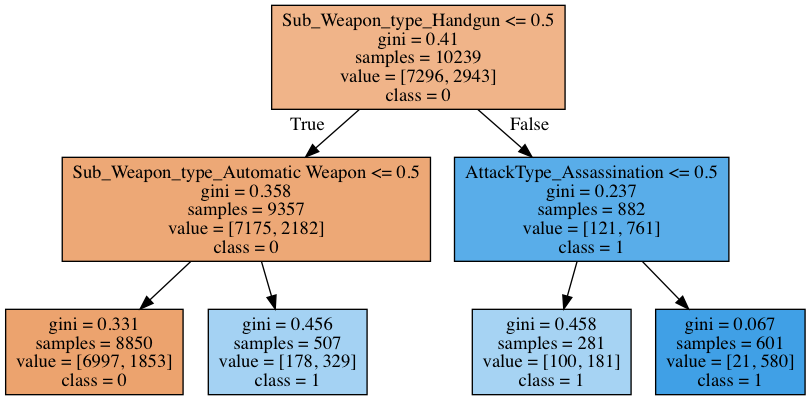

In [315]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Here, we found the most easily type can kill a western european are using handgun, automatic weapon and assassination. However, are these three type can lead heavy casualties? So we drawn a heatmap.

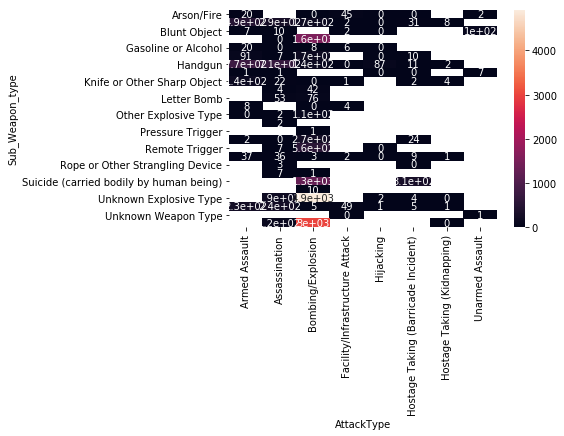

In [316]:
z = df_raw[df_raw['Region'] == 'Western Europe']
zz = z.groupby(['Sub_Weapon_type','AttackType'])['Total_num'].sum()
sns.heatmap(zz.unstack(),annot=True)

From the heatmap, we found those three type didn't lead to heavy casualties. In another word, the most easilest succeed three way in Western Europe actually lead low casualities. 
Then which attack type and weapon type are most favored by terrorists? 

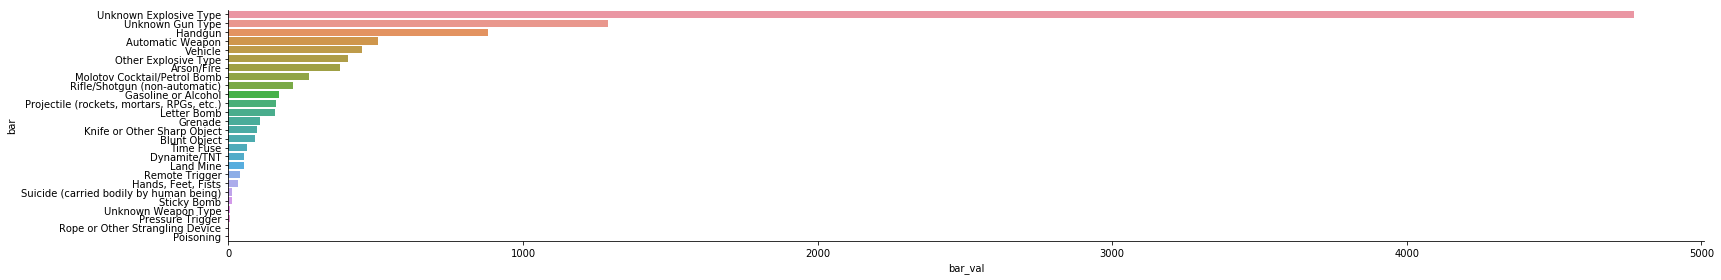

In [317]:
df_bar=z.groupby('Sub_Weapon_type').size().sort_values(ascending=False)
df_bar=pd.DataFrame({'bar': df_bar.index, 'bar_val':df_bar.values})
sns.factorplot(y='bar',x='bar_val',data=df_bar,kind='bar',aspect=6)

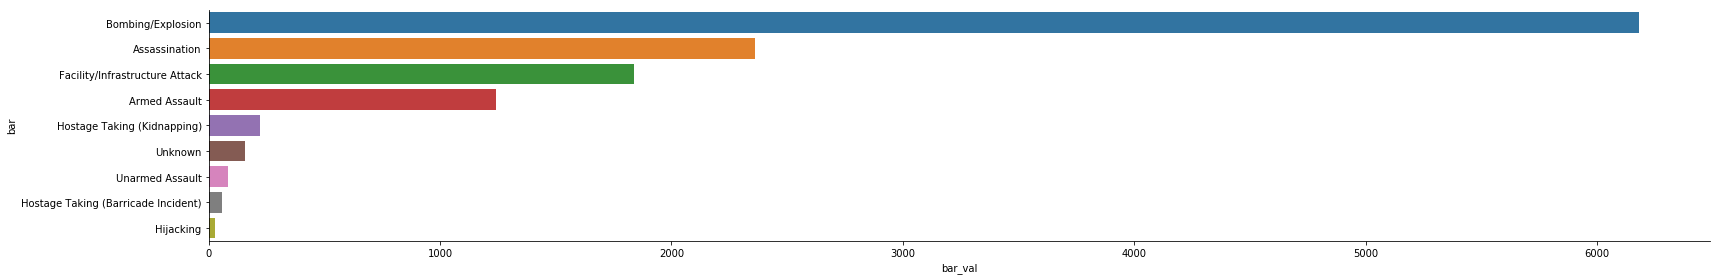

In [318]:
df_bar=z.groupby('AttackType').size().sort_values(ascending=False)
df_bar=pd.DataFrame({'bar': df_bar.index, 'bar_val':df_bar.values})
sns.factorplot(y='bar',x='bar_val',data=df_bar,kind='bar',aspect=6)

We can see the most type choosen by terrorist in Western Europs is Explosive and bombing, which is hard succeed in Europe, however, seen from the decision tree. We own to the strict regulation by government. 

## 2.2.2 Most Active Group

Also, from the region distribution in finding one, we found another reason that lead the low casualities in Western Europe.

In [319]:
df_30 = pd.read_csv('Times_30.csv')

In [320]:
len(df_30[df_30['Region'] == 'Western Europe'])/float(len(df_30))

0.31353951890034365

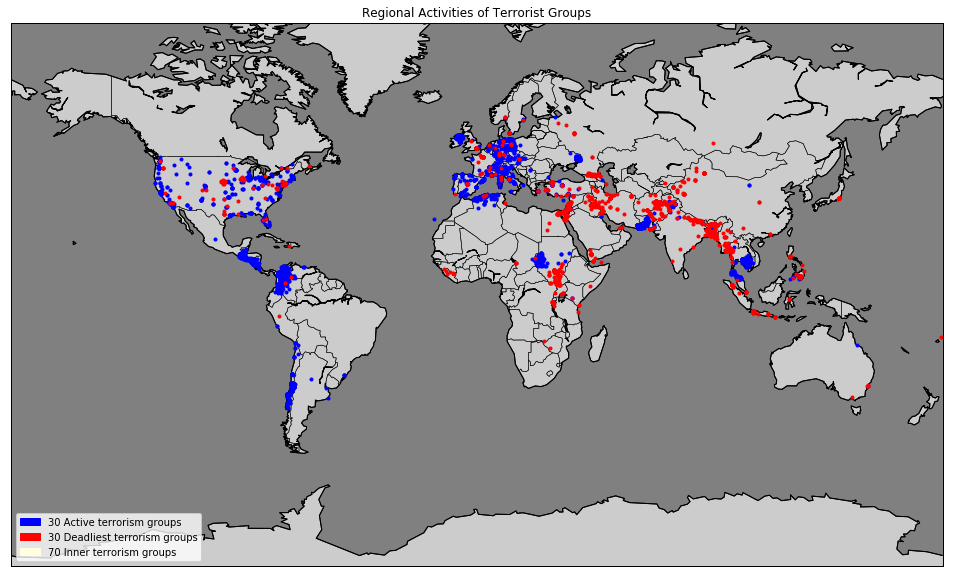

In [321]:
m4=draw_group(df_times_30,'b')
m4=draw_group(df_dead_30,'r')
patch1 = mpatches.Patch(color='b', label='30 Active terrorism groups')
patch2 = mpatches.Patch(color='r', label='30 Deadliest terrorism groups')
plt.legend(handles=[patch1,patch2,patch3],loc=3)
plt.title('Regional Activities of Terrorist Groups')
plt.show()


From the map above, we can see the 30 active terrorism groups love attack Western Europe. We think this attribute some to the low casualities in Western Europe. Also, we drawn a bar chart below to show it more clearly. 

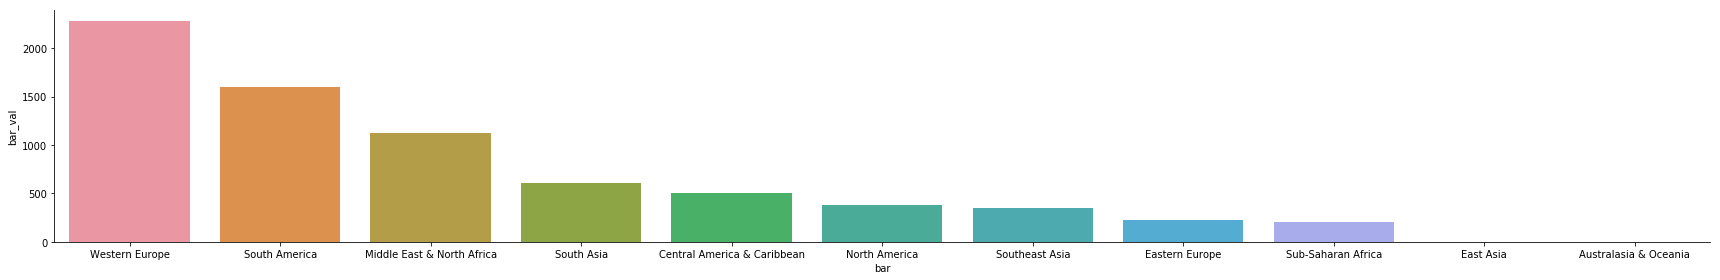

In [322]:
df_bar=df_30.groupby('Region').size().sort_values(ascending=False)
df_bar=pd.DataFrame({'bar': df_bar.index, 'bar_val':df_bar.values})
sns.factorplot(y='bar_val',x='bar',data=df_bar,kind='bar',aspect=6)

# 2.3 Conclusion

Therefore, we have to reason to explain the low casualities in Western Europe. First is the most easy way lead to attack success has few casualities which explain the low casualities and the most way used by terrorists is hard to succeed which explains the high attack time. Second reason is the 30 active groups, they lead both high attack time and low casualities to Western Europe.

## ------------------------------------------------Finding 3-------------------------------------------------

# Finding 3 : Are Oil or Gas Primary Targets for Terrorists? NO!

After we retrieved all of the data of Middle East & North Africa region as a sub dataset and found that anti-regime and combating for religious differences are their main reasonsfor attacks.

# 3.1 Assumption：

Generally, we assume that oil and gas are a big reason behind terrorism and and some terrorist groups are even reported that after they occupied the oil production area, they might trade them in black market for money to support themselves.

## 3.1.1: Number Of Terrorist Activities By Region

From our dataset, at first glance, it seems so. Especially when we aggregate the number of terrorist activities and casualties by region, we would find that across the world, Middle East & North Africa, which is also the well-known oil production region, is the most attacked region and also lost much more casualties among 12 regions. 

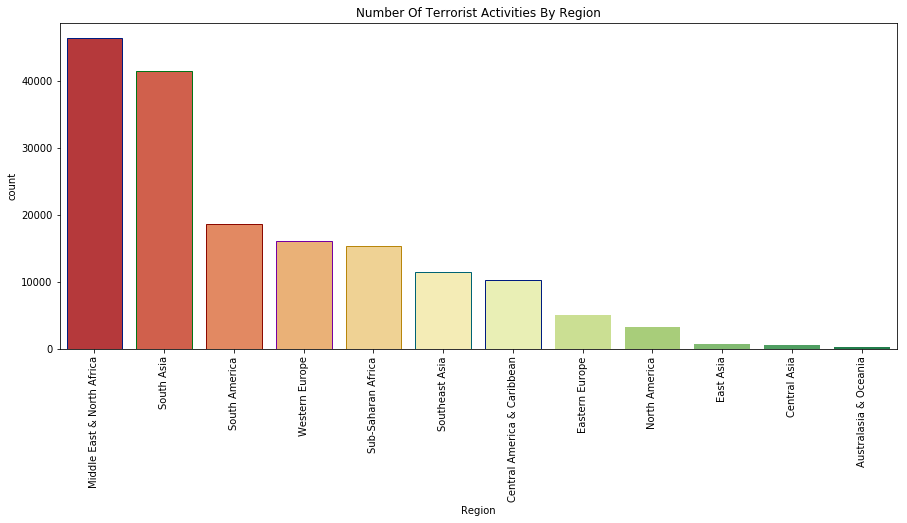

In [323]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

## 3.1.2: Number Of Terrorism Casualties By Region

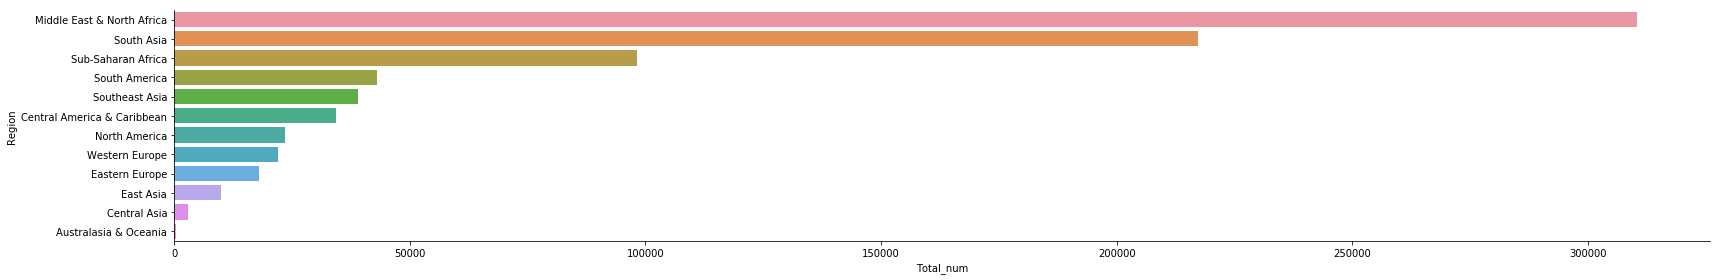

In [324]:
df_bar=df.groupby('Region')['Total_num'].sum().sort_values(ascending=False)
df_bar=pd.DataFrame({'Region': df_bar.index, 'Total_num':df_bar.values})
sns.factorplot(y='Region',x='Total_num',data=df_bar,kind='bar',aspect=6)

## 3.1.3: Top 16 Attacked Countries in Middle East & North Africa


And if we further look at this region by country, in this data set, there are 23 countries from this area. Top affected 16 countries in Middle East & North Africa are mainly oil production countries. 


In [325]:
Region_MiddleEast = df[df.Region == 'Middle East & North Africa']
Region_MiddleEast.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Sub_Target_type,success,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.532521,35.100248,Armed Assault,NaN,...,Tour Bus/Van,1,0,Firearms,Automatic Weapon,NaN,NaN,NaN,NaN,0
133,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,...,Aircraft (not at an airport),1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,2.0,1
158,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888629,35.495479,Bombing/Explosion,0.0,...,Embassy/Consulate,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,0.0,0
195,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,...,Embassy/Consulate,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,0.0,0
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.014836,28.961414,Bombing/Explosion,0.0,...,Airline Officer/Personnel,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,0.0,0


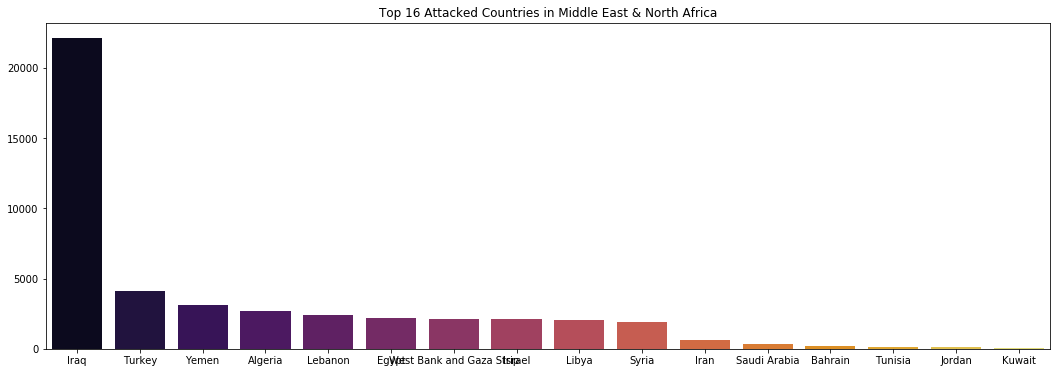

In [326]:
plt.subplots(figsize=(18,6))
sns.barplot(Region_MiddleEast['Country'].value_counts()[:16].index,Region_MiddleEast['Country'].value_counts()[:16].values,palette='inferno')
plt.title('Top 16 Attacked Countries in Middle East & North Africa')
plt.show()

## 3.1.4: Global Oil Ranking of Most Affected Countries in Middle East & North Africa

If we compare them with global oil producing ranking, 47% of them are among Top 50 oil producing countries. 

In [327]:
oil = pd.read_csv('Oil_Country.csv')
oil = oil.drop(['Unnamed: 0'],axis = 1)

In [328]:
oil.Country=oil.Country.apply(lambda x : x.decode('unicode_escape').encode('ascii','ignore'))

In [329]:
oil.columns.unique()

Index([u'Rank', u'Country'], dtype='object')

In [330]:
Oil_rank = Region_MiddleEast.merge(oil, left_on='Country', right_on='Country',how = 'left')

In [331]:
Oil_rank.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,success,suicide,Weapon_type,Sub_Weapon_type,Motive,Summary,addnotes,Total_num,casualities,Rank
0,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.532521,35.100248,Armed Assault,NaN,...,1,0,Firearms,Automatic Weapon,NaN,NaN,NaN,NaN,0,96.0
1,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,...,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,2.0,1,24.0
2,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888629,35.495479,Bombing/Explosion,0.0,...,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,0.0,0,151.0
3,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,...,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,0.0,0,96.0
4,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.014836,28.961414,Bombing/Explosion,0.0,...,1,0,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,NaN,0.0,0,54.0


In [332]:
ME_rank = Oil_rank[['Country','Rank']].drop_duplicates()
ME_rank.sort_values(by = ['Rank'],ascending = True).set_index(keys=[range(0,len(ME_rank))]).drop(0,axis=0)

,Country,Rank
1,Iran,4.0
2,Iraq,5.0
3,Kuwait,6.0
4,United Arab Emirates,7.0
5,Libya,9.0
6,Qatar,12.0
7,Algeria,16.0
8,Egypt,24.0
9,Yemen,30.0
10,Syria,32.0


In [333]:
(len(ME_rank[ME_rank.Rank <= 50])+0.0)*100/len(ME_rank)

47.82608695652174

And even 60% of them are OPEC member countries.

Text(0.5,1,u'OPEC country ratio')

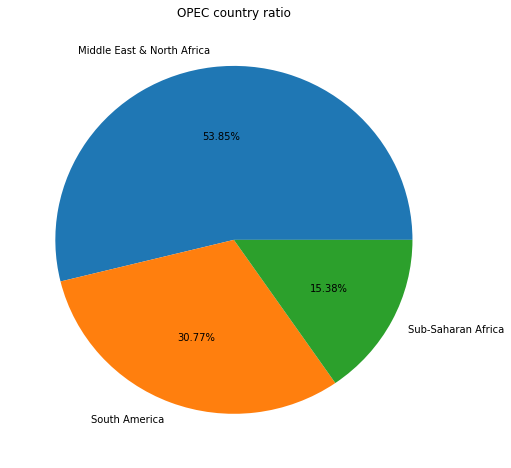

In [334]:
OPEC=[
'Algeria',
'Angola',
'Ecuador',
'Equatorial Guinea',
'Gabon',
'Iran',
'Iraq',
'Kuwait',
'Libya',
'Nigeria',
'Qatar',
'Saudi Arabia',
'United Arab Emirates',
'Venezuela']
opec_country=pd.DataFrame({'Country':OPEC, 'Region_null':OPEC}).set_index(keys=[range(0,len(OPEC))]).drop(0,axis=0)
Count_opec=[]
for country in Region_MiddleEast.Country:
    if country in OPEC:
        Count_opec.append(country)
        
list_region_null=[]
for country in opec_country.Country:
    region_null=df[df.Country==country].Region.values[0]
    list_region_null.append(region_null)
opec_country.Region_null=list_region_null
label_opec=opec_country.groupby('Region_null').count().index
X_opec=[7,4,2]
fig = plt.figure()  
fig.set_size_inches(8,8) 
plt.pie(X_opec,labels=label_opec,autopct='%1.2f%%')
plt.title("OPEC country ratio")

But if we deep into the data, we will found this is not the whole story! 

Maybe Middle East & North Africa is indeed he main area for oil production in the world. But oil and gas are not the main intention for terrorist groups to plot an attack there. Then what are their primary targets for terrorism?

# 3.2 Analysis：

Firstly, from the point view of the target type, the number of business type as a target which including the oil or gas attack is only ranked no.5 of 30 types and the first four are Private Citizens & Property (13929), Military (8215), Police (6531), Government (General) (4090), Business (3879). 

## 3.2.1 : Target type for Middle East & North Africa

According to their target type and sub target type, we found their main target type are still government, military and private citizen. Business reason are secondary.
(Because Terrorist attacking on oil infrastructure is mainly to weaken economies, undermine the authority of governments and exploit local grievances.”)


In [335]:
Region_MiddleEast.groupby('Target_type')['Country'].count().sort_values(ascending  = False)

Target_type
Private Citizens & Property       13890
Military                           8185
Police                             6518
Government (General)               4075
Business                           3863
Unknown                            1626
Terrorists/Non-State Militia       1606
Religious Figures/Institutions     1218
Transportation                     1159
Government (Diplomatic)             778
Educational Institution             777
Utilities                           762
Journalists & Media                 640
Violent Political Party             373
Airports & Aircraft                 272
Other                               186
Tourists                            136
NGO                                 118
Telecommunication                    70
Maritime                             53
Food or Water Supply                 49
Name: Country, dtype: int64

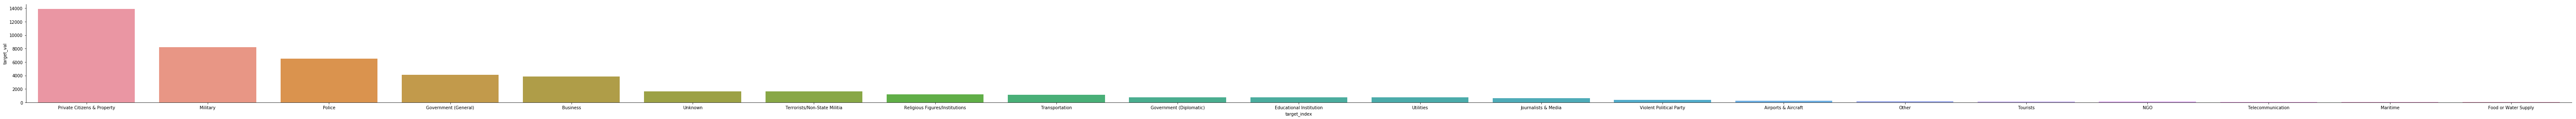

In [336]:
df_target=Region_MiddleEast.groupby('Target_type')['Country'].count().sort_values(ascending  = False)
df_target=pd.DataFrame({'target_index': df_target.index, 'target_val':df_target.values})
sns.factorplot(y='target_val',x='target_index',data=df_target,kind='bar',aspect=21)

## 3.2.2 : Sub Target Type for Middle East & North Africa

Secondly, if we see from sub target type which represents the specific targets for each broad target type, we found that oil or gas as a sub target type are out of 30 and still the first three are all about citizen, government and military including Unnamed Civilian/Unspecified (4820), Police Security Forces/ Officers (3192), Military Personnel (soldiers, troops, officers, forces) (2863), Military Unit/Patrol/Convoy (1999).


In [337]:
index1=Region_MiddleEast.groupby('Sub_Target_type')['Country'].count().sort_values(ascending  = False).rank().index

In [338]:
Region_MiddleEast.groupby('Sub_Target_type')['Country'].count().sort_values(ascending  = False).head(35)

Sub_Target_type
Unnamed Civilian/Unspecified                                               4806
Police Security Forces/Officers                                            3185
Military Personnel (soldiers, troops, officers, forces)                    2851
Military Unit/Patrol/Convoy                                                1990
Village/City/Town/Suburb                                                   1822
Government Personnel (excluding police, military)                          1684
Police Patrol (including vehicles and convoys)                             1557
Military Barracks/Base/Headquarters/Checkpost                              1398
Marketplace/Plaza/Square                                                   1354
Non-State Militia                                                          1346
Retail/Grocery/Bakery                                                      1112
House/Apartment/Residence                                                  1090
Military Checkpoint     

In [339]:
value=Region_MiddleEast.groupby('Sub_Target_type')['Country'].count().sort_values(ascending  = False).rank().values

In [340]:
df_get_rank=pd.DataFrame({'index1':index1,'value':value})

In [341]:
df_get_rank[df_get_rank.index1 == 'Gas/Oil']

,index1,value
35,Gas/Oil,73.0


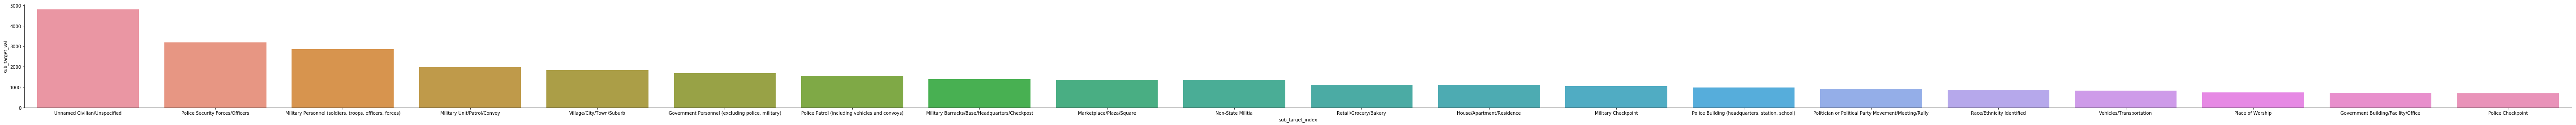

In [342]:
df_sub_target=Region_MiddleEast.groupby('Sub_Target_type')['Country'].count().sort_values(ascending  = False).head(20)
df_sub_target=pd.DataFrame({'sub_target_index': df_sub_target.index, 'sub_target_val':df_sub_target.values})
sns.factorplot(y='sub_target_val',x='sub_target_index',data=df_sub_target,kind='bar',aspect=20)

## 3.2.3 : Motives by Wordcloud Reflect Religious And Political Appeals

Thirdly, we analyzed from the motive of terrorism. And the following are two word cloud pics made from the most frequent word the terrorist groups use to declare their intention openly to the rest of the world every time for an attack. 


This one just explains even for those terrorists who are directly targeting oil and gas, their motives are more about nation, government and president, which are inclined to be political appeals. 

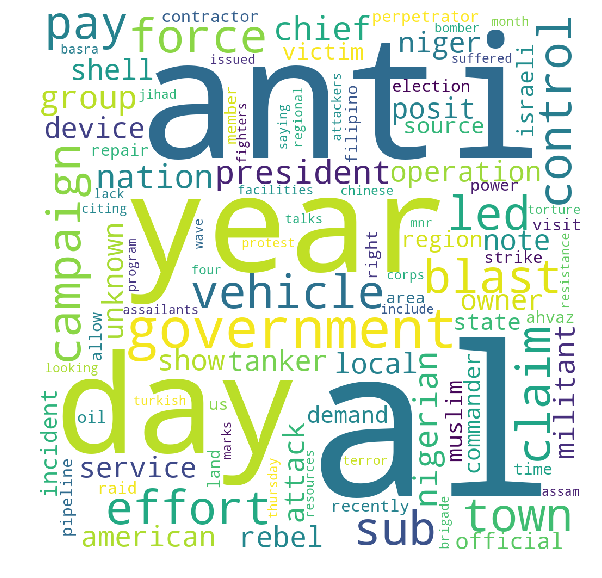

In [343]:
import matplotlib.image as mpimg
pi_c = mpimg.imread('oil_movtive.png') 
pi_c.shape
plt.imshow(pi_c) 
plt.axis('off') 
fig=plt.gcf()
fig.set_size_inches(20,10) 
plt.show()

And this one illustrates those attacks what are targeting religious institutes and figures are more about different religious denomination.


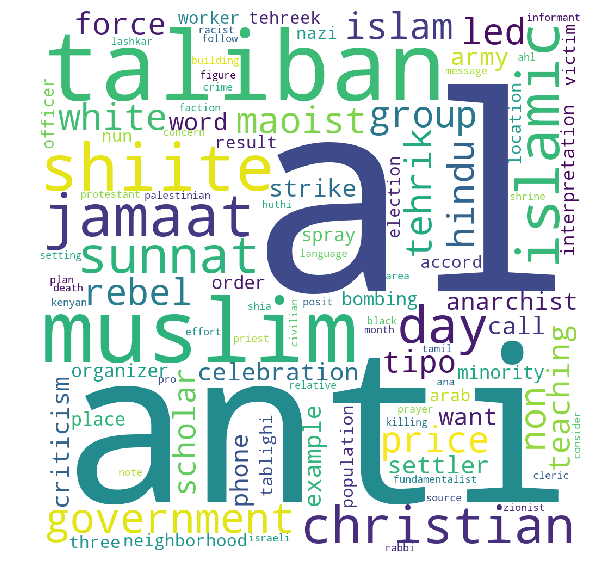

In [344]:
import matplotlib.image as mpimg
pi_c = mpimg.imread('religion_movtive.png') 
pi_c.shape
plt.imshow(pi_c) 
plt.axis('off') 
fig=plt.gcf()
fig.set_size_inches(20,10) 
plt.show()

# 3.3 Conclusion:

Therefore, back to our finding, from this dataset we could say that oil or gas are actually not the priorities for terrorists to plot attacks in Middle East and North Africa, governments and religious places are their primary targets.  

In one word, terrorism are more about politics and religion instead of economy. And this can also answer the question we brought at the beginning that why economic condition improved, terrorism instead penetrated more globally. Because their priorities are politics and religion not economy.
